In [39]:
import files_process_save as fps
import pathlib
import pandas as pd
import numpy as np
from typing import Union
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
temp_path = fps.check_file("temperatur.csv")
df_temp = pd.read_csv(temp_path)
df_temp.set_index("Date", inplace=True)
df_temp.index = pd.to_datetime(df_temp.index, dayfirst=True)

In [41]:
df_temp.loc["2014-09-29"]

temperature - A    0.0
temperature - B    0.0
Name: 2014-09-29 00:00:00, dtype: float64

In [42]:
def check_temp_values_range(df_temp: pd.DataFrame) -> pd.DataFrame:
    """
    Check and replace incorrect values with nan.
    (Zero values or values out of defined ranges)
    """
    df_temp.replace(0, np.nan, inplace=True)
    ranges_val = [15, 35]
    col_names_lst = ["temperature - A", "temperature - B"]

    for i in range(2):
        name = col_names_lst[i]
        low = ranges_val[0]
        high = ranges_val[1]
        df_temp.loc[:, df_temp.columns.str.contains(name)] = df_temp.loc[
            :, df_temp.columns.str.contains(name)
        ].apply(lambda x: [value if low < value < high else np.nan for value in x])

    return df_temp

In [43]:
df_temp = check_temp_values_range(df_temp)

In [44]:
df_temp.loc["2014-09-29"]

temperature - A   NaN
temperature - B   NaN
Name: 2014-09-29 00:00:00, dtype: float64

In [45]:
df_temp.interpolate(inplace=True, method="time")

In [46]:
df_temp.loc["2014-09-29"]

temperature - A    27.865
temperature - B    27.115
Name: 2014-09-29 00:00:00, dtype: float64

In [47]:
df_temp

,temperature - A,temperature - B
Date,,
2010-01-01,22.32,21.74
2010-01-02,22.21,21.76
2010-01-03,21.99,21.49
2010-01-04,22.05,21.58
2010-01-05,22.08,21.70
...,...,...
2020-12-27,22.58,22.50
2020-12-28,22.63,22.44
2020-12-29,22.76,22.56


(14610.0, 18627.0)

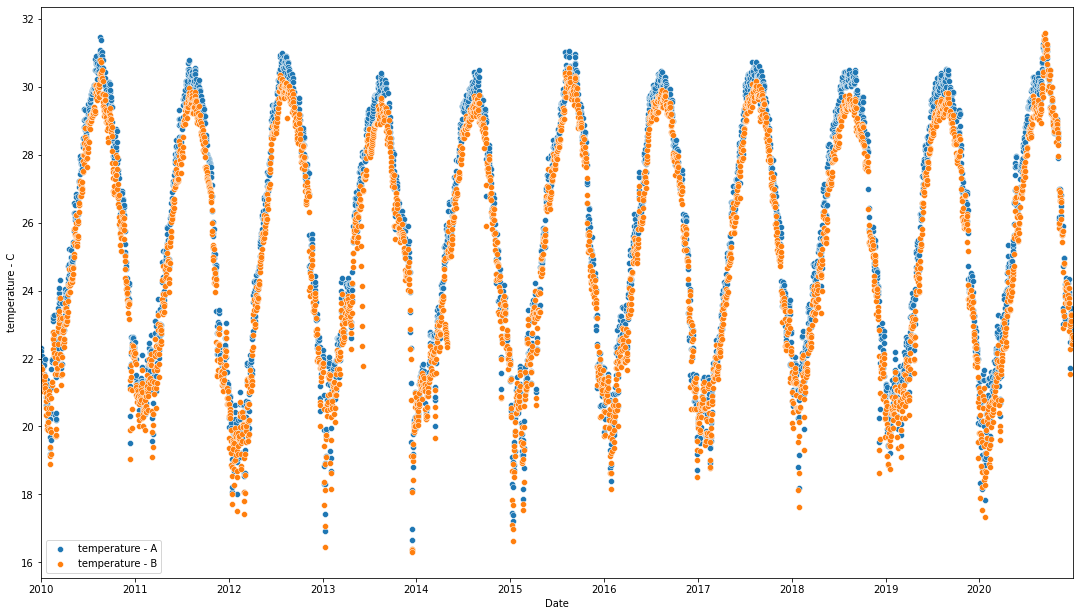

In [48]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
_=sns.scatterplot(data=df_temp, x=df_temp.index, y="temperature - A", ax=ax)
_=sns.scatterplot(data=df_temp, x=df_temp.index, y="temperature - B", ax=ax)
plt.ylabel("temperature - C")
plt.legend(["temperature - A", "temperature - B"])
plt.xlim(df_temp.index.min(), df_temp.index.max())
#_=plt.ylim(0, 10)

In [49]:
df_temp["Temperature"]= df_temp.iloc[: , 0:2].mean(axis=1)


In [50]:
df_temp["Temperature"].index.names = ['date']

In [51]:
df_temp["Temperature"]

date
2010-01-01    22.030
2010-01-02    21.985
2010-01-03    21.740
2010-01-04    21.815
2010-01-05    21.890
               ...  
2020-12-27    22.540
2020-12-28    22.535
2020-12-29    22.660
2020-12-30    22.660
2020-12-31    22.735
Name: Temperature, Length: 4018, dtype: float64

In [52]:
df_temp["Temperature"].to_csv(pathlib.Path("clean_tables/temperatur.csv"))